# Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric Submissions are evaluated on Mean-Squared-Error (MSE). Submission File Format The file should contain a header and have the following format:

    Id,SalePrice
    1461,169000.1
    1462,187724.1233
    1463,175221

## Read Data

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
train =  pd.read_csv("D://Code/D_Ethive/training_set.csv")
test = pd.read_csv("D://Code/D_Ethive/testing_set.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing Data treatment

In [7]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
train.shape

(1460, 81)

In [9]:
pd.set_option("display.max_rows",1460)

In [10]:
# train

In [11]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
train.Alley = train.Alley.fillna("No alley access")
train.BsmtQual = train.BsmtQual.fillna("No Basement")
train.BsmtCond = train.BsmtCond.fillna("No Basement")
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
train.GarageType = train.GarageType.fillna("No Garage")
train.GarageFinish = train.GarageFinish.fillna("No Garage")
train.GarageQual = train.GarageQual.fillna("No Garage")
train.GarageCond = train.GarageCond.fillna("No Garage")
train.PoolQC = train.PoolQC.fillna("No Pool")
train.Fence = train.Fence.fillna("No Fence")
train.MiscFeature = train.MiscFeature.fillna("None")

In [13]:
from HPP import replacer
replacer(train)

In [14]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [15]:
test.Alley = test.Alley.fillna("No alley access")
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")
test.PoolQC = test.PoolQC.fillna("No Pool")
test.Fence = test.Fence.fillna("No Fence")
test.MiscFeature = test.MiscFeature.fillna("None")

In [16]:
from HPP import replacer
replacer(test)

In [17]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

## EDA

In [18]:
Y = train[["SalePrice"]]
X = train.drop(labels=["SalePrice","Id"],axis = 1)

In [19]:
from HPP import ANOVA,chisquare
train.corr()[["SalePrice"]].sort_values(by="SalePrice")

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


In [20]:
for i in train.columns:
    if(train[i].dtypes == "object"):
        print("SalePrice vs",i,": --> ",ANOVA(train,i,"SalePrice"))

SalePrice vs MSZoning : -->  0.0
SalePrice vs Street : -->  0.117
SalePrice vs Alley : -->  0.0
SalePrice vs LotShape : -->  0.0
SalePrice vs LandContour : -->  0.0
SalePrice vs Utilities : -->  0.585
SalePrice vs LotConfig : -->  0.0
SalePrice vs LandSlope : -->  0.141
SalePrice vs Neighborhood : -->  0.0
SalePrice vs Condition1 : -->  0.0
SalePrice vs Condition2 : -->  0.043
SalePrice vs BldgType : -->  0.0
SalePrice vs HouseStyle : -->  0.0
SalePrice vs RoofStyle : -->  0.0
SalePrice vs RoofMatl : -->  0.0
SalePrice vs Exterior1st : -->  0.0
SalePrice vs Exterior2nd : -->  0.0
SalePrice vs MasVnrType : -->  0.0
SalePrice vs ExterQual : -->  0.0
SalePrice vs ExterCond : -->  0.0
SalePrice vs Foundation : -->  0.0
SalePrice vs BsmtQual : -->  0.0
SalePrice vs BsmtCond : -->  0.0
SalePrice vs BsmtExposure : -->  0.0
SalePrice vs BsmtFinType1 : -->  0.0
SalePrice vs BsmtFinType2 : -->  0.0
SalePrice vs Heating : -->  0.001
SalePrice vs HeatingQC : -->  0.0
SalePrice vs CentralAir : --> 

In [21]:
X = X.drop(labels=["Utilities","Street"],axis=1)

In [22]:
from HPP import preprocessing
Xnew = preprocessing(X)

## Split

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

## Model OLS

In [24]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()

In [25]:
prev_rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().tail(1).index[0]
Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xval,ytrain,yval = train_test_split(Xnew,Y,test_size=0.2,random_state=31)
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
curr_rsq = model.rsquared_adj
print("Previous:",round(prev_rsq,5),"\tCurrent:",round(curr_rsq,5),"\t",col_to_drop)

Previous: 0.93323 	Current: 0.93323 	 ExterCond_Ex


## Check for overfitting

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xval)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(yval,pred_ts)

print("Traning Error :- ",tr_err)
print("Testing Error :- ",ts_err)

Traning Error :-  12419.130993150686
Testing Error :-  19508554928237.285


## Regularize

In [27]:
from sklearn.linear_model import Ridge

def reg(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xval)
    
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(yval,pred_ts)
    
    print("Training Error:",tr_err)
    print("Validation Error:",ts_err)
    print("-------------------------")
    return ts_err

In [28]:
W = []
e = 0.0
for i in range(0,1000):
    W.append(round(e,3))
    e = e + 0.001

In [29]:
err = []
for i in W:
    rr = Ridge(alpha=i)
    print("----------","Alpha",i,"---------")
    tr_err = reg(rr)
    err.append(tr_err)

---------- Alpha 0.0 ---------
Training Error: 13202.504280821919
Validation Error: 4.808912874009577e+16
-------------------------
---------- Alpha 0.001 ---------
Training Error: 12418.342264258934
Validation Error: 18287.557085186723
-------------------------
---------- Alpha 0.002 ---------
Training Error: 12418.665614386431
Validation Error: 18286.079813734534
-------------------------
---------- Alpha 0.003 ---------
Training Error: 12419.032364611921
Validation Error: 18284.607645872817
-------------------------
---------- Alpha 0.004 ---------
Training Error: 12419.39317192481
Validation Error: 18283.1405079913
-------------------------
---------- Alpha 0.005 ---------
Training Error: 12419.740021264444
Validation Error: 18281.67830943607
-------------------------
---------- Alpha 0.006 ---------
Training Error: 12420.175153345976
Validation Error: 18280.220948289032
-------------------------
---------- Alpha 0.007 ---------
Training Error: 12420.595850791015
Validation Error: 

In [30]:
err

[4.808912874009577e+16,
 18287.557085186723,
 18286.079813734534,
 18284.607645872817,
 18283.1405079913,
 18281.67830943607,
 18280.220948289032,
 18278.768315720186,
 18277.32029925547,
 18275.876785217435,
 18274.437660531934,
 18273.002814047904,
 18271.953745757433,
 18270.93556156475,
 18269.917119057536,
 18268.898483320216,
 18267.879710714715,
 18266.860850368717,
 18265.841945402834,
 18264.823033944227,
 18263.804149968288,
 18262.78532399708,
 18261.76658367841,
 18260.747954266044,
 18259.729459021797,
 18258.711119545686,
 18257.93879846919,
 18257.18375609396,
 18256.426858934534,
 18255.804954158953,
 18255.302512920738,
 18254.796355392544,
 18254.286574751975,
 18253.773260302114,
 18253.256497775485,
 18252.736369603794,
 18252.212955159957,
 18251.68633097485,
 18251.15657093242,
 18250.62374644336,
 18250.136138532253,
 18249.691494603783,
 18249.24327792508,
 18248.791565686683,
 18248.336432721746,
 18247.87795163281,
 18247.548935211533,
 18247.29299574087,
 182

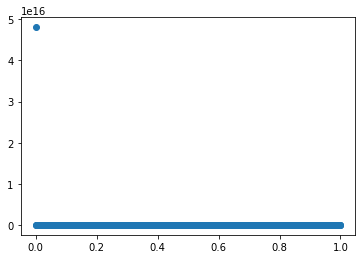

In [31]:
import matplotlib.pyplot as plt
plt.scatter(W,err)

## Train the selected regularized model

In [39]:
rr = Ridge(alpha = 0.07)
model = rr.fit(Xnew,Y)

In [40]:
Xnew.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=297)

## Prepare test data

In [41]:
xtest = preprocessing(test)

In [42]:
xtest[Xnew.columns]

KeyError: "['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC'] not in index"

In [43]:
r = ['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC']

In [44]:
for i in r:
    xtest[i]=0

In [45]:
xfinal = xtest[Xnew.columns]

In [46]:
pred_final = model.predict(xfinal)

In [47]:
final_sub = test[["Id"]]
final_sub["SalePrice"]=pred_final

In [48]:
final_sub.to_csv("D://Code/D_Ethive/submission.csv",index=None)

In [ ]:
final_sub

,Id,SalePrice
0,1461,115157.338285
1,1462,151662.535314
2,1463,191618.539341
3,1464,199469.692867
4,1465,204194.458455
5,1466,173869.330171
6,1467,173013.723526
7,1468,159556.568336
8,1469,212026.042165
9,1470,115826.129702
